In [97]:
import shutil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
directory = os.getenv('HOME') +'/aiffel/aiffelthon/'

In [48]:
os.listdir(directory +'final')

['Train_set_long_sequence_finalv1.csv',
 'raw_data_sampling(0223).csv',
 'Train_set_data.csv',
 'Test_set_data_sampling(0223).csv',
 'Train_set_long_sequence.csv']

In [47]:
df = pd.read_csv(directory + 'meta/meta_data_raw_0306.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977518 entries, 0 to 3157241
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   title             2977518 non-null  object
 1   creator           2977518 non-null  object
 2   distributor       2977050 non-null  object
 3   year              2977518 non-null  object
 4   category          2977050 non-null  object
 5   annotation_level  2977518 non-null  object
 6   sampling          2976740 non-null  object
 7   author            2915259 non-null  object
 8   publisher         2915259 non-null  object
 9   date              2977518 non-null  object
 10  topic             2977518 non-null  object
 11  age               2977518 non-null  object
 12  sex               2977518 non-null  object
 13  prin_res          2977518 non-null  object
 14  curr_res          2977518 non-null  object
 15  age2              2150363 non-null  object
 16  sex2              

In [53]:
df2 = pd.read_csv(directory + 'final/Train_set_data.csv', usecols = ['dial','text','eng'])

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065918 entries, 0 to 1065917
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1065918 non-null  object
 1   dial    1065918 non-null  object
 2   eng     1065918 non-null  object
dtypes: object(3)
memory usage: 24.4+ MB


In [56]:
dfm = df2.merge(df, on ='dial', how='left')

In [67]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397528 entries, 0 to 1397527
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   text              1397528 non-null  object
 1   dial              1397528 non-null  object
 2   eng               1397528 non-null  object
 3   title             1281498 non-null  object
 4   creator           1281498 non-null  object
 5   distributor       1281316 non-null  object
 6   year              1281498 non-null  object
 7   category          1281316 non-null  object
 8   annotation_level  1281498 non-null  object
 9   sampling          1281017 non-null  object
 10  author            1257070 non-null  object
 11  publisher         1257070 non-null  object
 12  date              1281498 non-null  object
 13  topic             1281498 non-null  object
 14  age               1281498 non-null  object
 15  sex               1281498 non-null  object
 16  prin_res          

In [70]:
d_ind = dfm.loc[dfm['stdn'].isna()==True].index

In [72]:
dfm.drop(index=d_ind, inplace=True)

In [78]:
d_ind = dfm.loc[dfm.dial.duplicated()==True].index
dfm.drop(index=d_ind, inplace=True)

In [79]:
dfm.reg.value_counts()

kw    345244
jj    203349
jd    174833
gs    114787
cc    111675
Name: reg, dtype: int64

In [80]:
dfm.to_csv(directory  + 'meta/meta_eng_raw_0306_v1.csv', index=False)

In [82]:
dfm.dial.duplicated().sum()

0

In [83]:
df = dfm

In [96]:
df['eojeol_stdn'].unique()

array(["[['(바뀌드라고)/(바뀌더라고)']]", "[['(알겄는가)/(알겠는가)']]",
       "[['(생각난디야.)/(생각난다.)']]", ..., "[['(다니는데이)/(다니는데)', '(어서)/(없어)']]",
       "[['(조석)/(#조석)', '(있는디)/(있는데)']]", "[['(모이난이)/(모이니까)']]"],
      dtype=object)

## seq 기준 분석

In [84]:
df.reg.value_counts()

kw    345244
jj    203349
jd    174833
gs    114787
cc    111675
Name: reg, dtype: int64

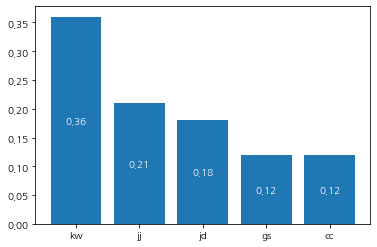

In [85]:
data = df.reg.value_counts(normalize=True).round(2)
fig, ax= plt.subplots()
bar = ax.bar(data.index, data)
ax.bar_label(bar, label_type ='center', color = 'white')
plt.show()

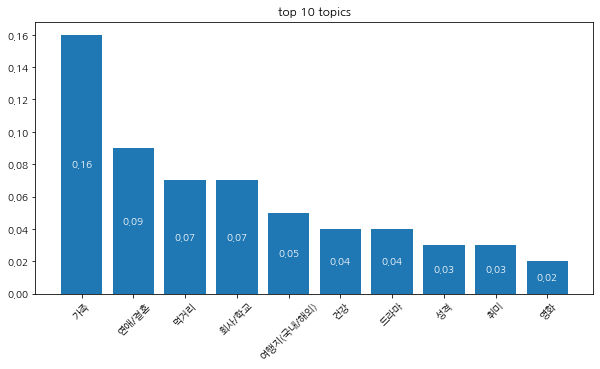

In [86]:
plt.rcParams.update({'font.family': 'NanumGothic'})
data = df.topic.value_counts(normalize=True).head(10).round(2)
fig, ax= plt.subplots(figsize=(10,5))
bar = ax.bar(data.index, data)
ax.bar_label(bar, label_type ='center', color = 'white')
plt.xticks(rotation=45)
plt.title("top 10 topics")
plt.show()

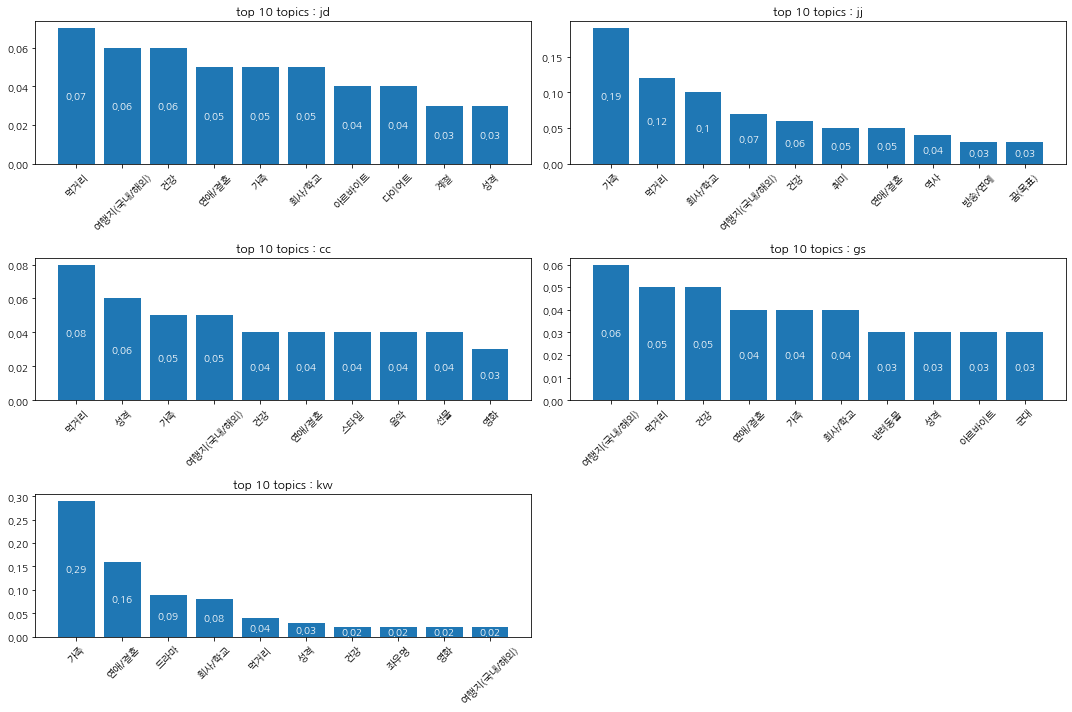

In [87]:
data = df.groupby('reg')['topic'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp)
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

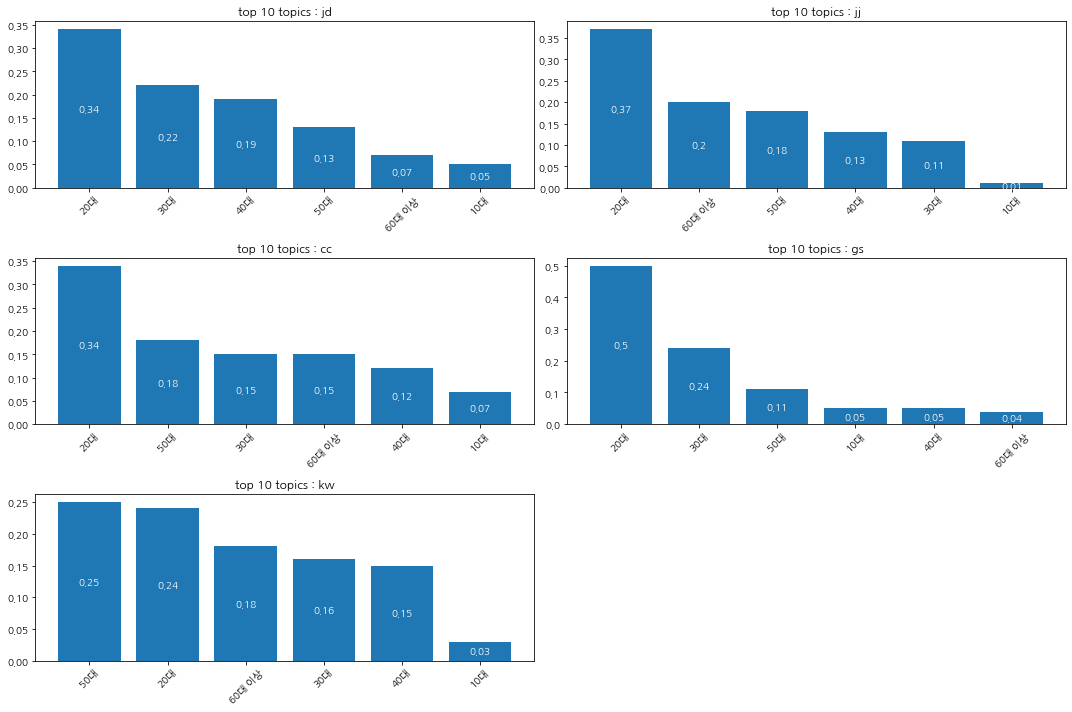

In [88]:
data = df.groupby('reg')['age'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp)
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

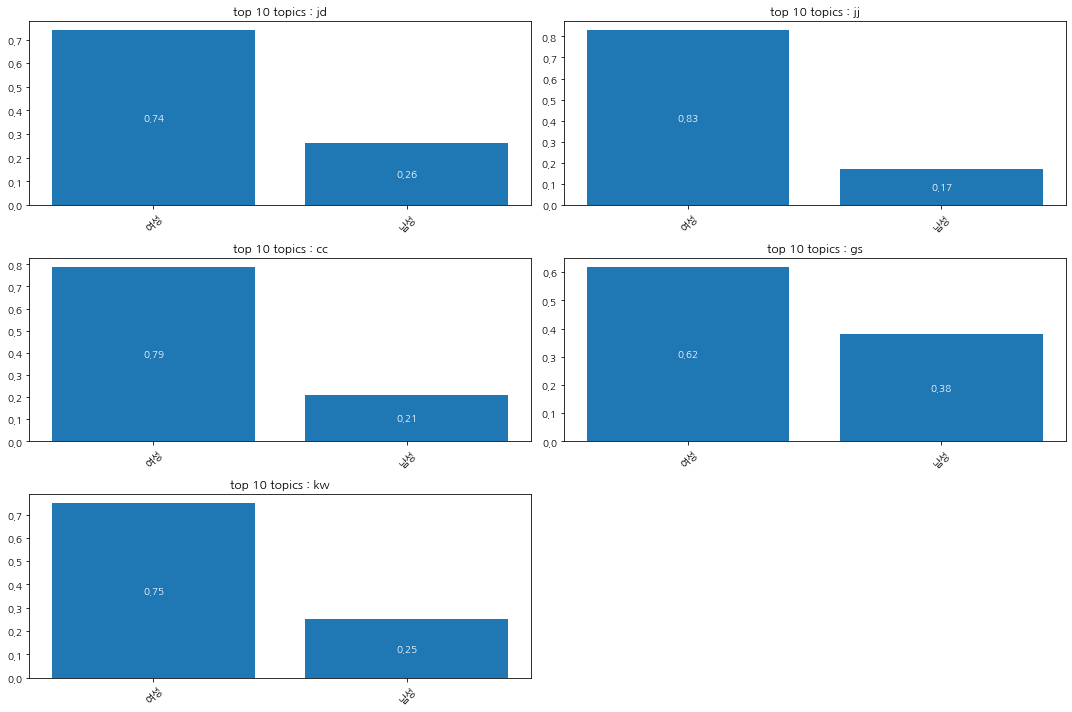

In [89]:
data = df.groupby('reg')['sex'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp)
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

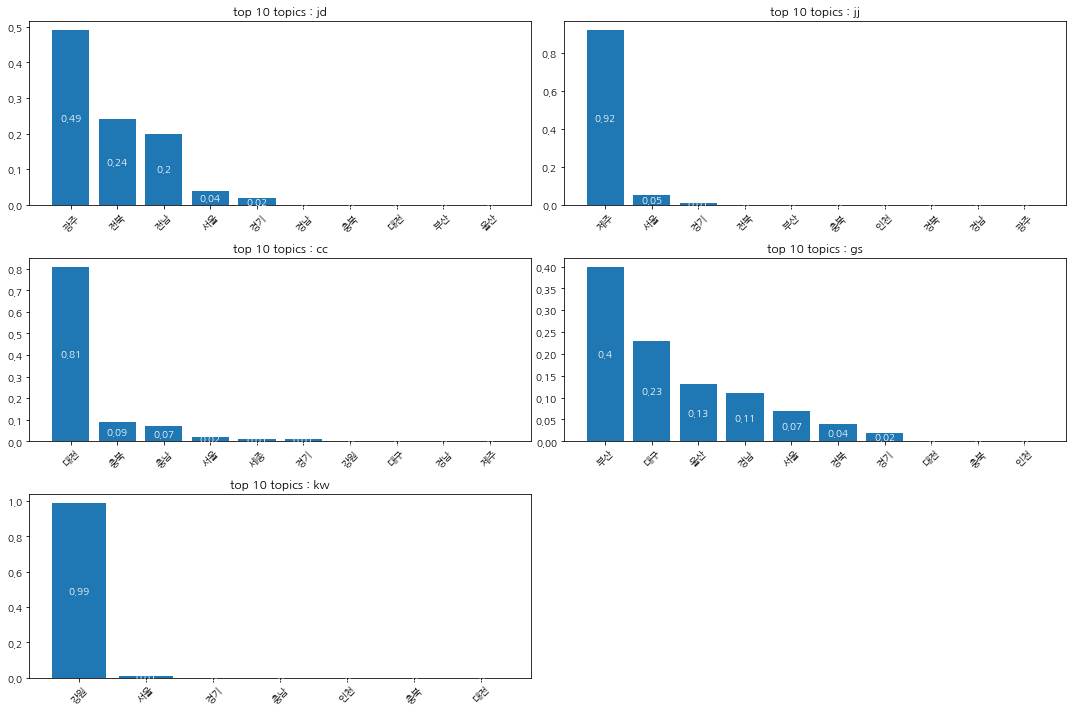

In [90]:
data = df.groupby('reg')['curr_res'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp)
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

## doc 기준 분석

In [91]:
temp = df.loc[:,['title','topic','reg']].copy()
temp.drop_duplicates(inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30307 entries, 0 to 1397524
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   30307 non-null  object
 1   topic   30307 non-null  object
 2   reg     30307 non-null  object
dtypes: object(3)
memory usage: 947.1+ KB


In [92]:
temp.reg.value_counts()

gs    7552
jd    7170
cc    5914
jj    5033
kw    4638
Name: reg, dtype: int64

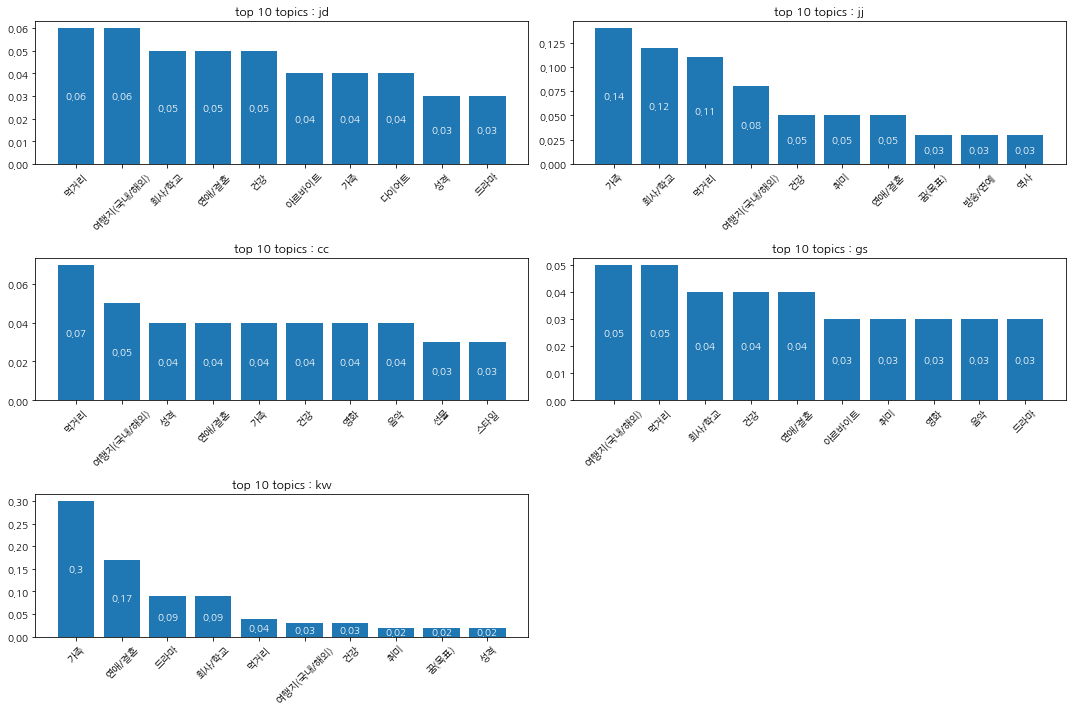

In [93]:
data = temp.groupby('reg')['topic'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp)
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()